In [2]:
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

import os

# Статистическое тестирование гипотез

Суть статистического тестирования гипотез сводится к следующим шагам:
1. Формулируется гипотеза (**нуль-гипотеза**) о значении некоторой статистики (численной фнукции, зависящей только от членов выборки) для популяций (-ции), из которых были набраны наши наборы данных.
2. Формулируется альтернативная гипотеза.
3. Задаётся уровень статистической значимости (**альфа**).
4. Вычисляется значение этой статистики на имеющихся выборках.
5. Определяется распределение (формульное или сэмплированием) этой статистики.
6. На основе полученного распределения определяется вероятность (**p-значение**) получить значение статистики равное или превышающее значение, полученное в п.3.
7. Если p-значение меньше альфа, то нуль гипотеза отвергается в пользу альтернативной, в противном случае нуль-гипотеза не отвергается.

Смысл **p-значения** - вероятность слуайным образом получить значение статистики равное или более экстремальное, *при условии справедливости нуль-гипотезы*.

## Виды статистических ошибок
1. Ошибка первого рода - отвергаем нуль-гипотезу, хотя она верна.
2. Ошибка второго рода - отвергаем альтернативную гипотезу, хотя она верна.

Обычно ошибки первого рода для нас более критичны, поэтому альфа выбирают достаточно малым (0.05, 0.01, 0.005). Однако при уменьшении альфа одновременно повышается вероятность ошибки второго рода, поэтому в некоторых случаях, когда для нас важно получить малое значение ошибок первого *и* второго рода, имеет смысл не делать p-значение слишком маленьким.

# Быстрый выбор теста

### Критерий выбора статистики центра
1. Если распределение хотя бы одной из выборок существенно отличается от нормального - используем медиану
2. В остальных случаях среднее арифметическое.

### Критерий существенного отклонения от нормальности:
1. Наличие выбросов
2. Явная ассимметрия гистрограммы
3. Очень сильное отклонение формы гистограммы от колоколообразной формы (ступенька - пограничная форма)

Либо что-то из автоматизированных
1. Тест [Шапиро-Вилка](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html#scipy.stats.shapiro)
2. Тест [Харке-Бера](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.jarque_bera.html#scipy.stats.jarque_bera)
3. [Тест нормальности](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html#scipy.stats.normaltest)

Эти тесты в асимптотическом (формульном) варианте хорошо работают на больших выборках. С небольшими выборками можно использовать любую из их статистик и метод Монте-Карло.

### **Различные тесты**

#### Категориальные данные
* [тест хи-квардрат](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html#scipy.stats.chi2_contingency)
* Для таблиц сопряженности с небольшой суммой всех значений в таблице сопряженностей можно пользоваться [точным тестом Фишера](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.fisher_exact.html#scipy.stats.fisher_exact)
#### Проверка равенства дисперсий
* [Тест Флингера-Киллина](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.fligner.html#scipy.stats.fligner)

#### Проверка равенства средних значений
* Равенство среднего конкретному значению [ttest_1samp](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html#scipy.stats.ttest_1samp)
* Равенство средних двух независимых выборок [ttest_ind](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html#scipy.stats.ttest_ind)
* Равенство средних двух связанных выборок (наблюдаются одни и теже объекты до и после некоторого события) [ttest_rel](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html#scipy.stats.ttest_rel)
* Равенство средних значений нескольких (>2) групп [f_oneway](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html#scipy.stats.f_oneway)

#### Проверка равенства рангов (медиан/квантилей)
* Равенство медиан двух независимых выборок [Ман-Уитни](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html#scipy.stats.mannwhitneyu)
* Равенство медиан двух связанных выборок (наблюдаются одни и теже объекты до и после некоторого события) [Вилкоксон](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.wilcoxon.html#scipy.stats.wilcoxon)
* Равенство медиан значений нескольких (>2) групп тест [Краскера-Уоллиса](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kruskal.html#scipy.stats.kruskal) 

#### Проверка корреляций
* Линейная корреляция [Пирсон](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html#scipy.stats.pearsonr)
* Монотонная корреляция [Спирман](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html#scipy.stats.spearmanr)

# Resampling и формульные тесты

В целом можно выделить 2 вида тестов гипотез: 
* **формульные** или **асимпоттические**. В этом случае p-значение вычисляется на основе некоторого торетического распределения используемой статистики. Эти методы работают быстро, но накладывают определенные ограничения на используемые данные и делают некоторые предположения относительно изучаемой популяции.
* Основанные на **многократном повторном сэмплировании** имеющихся данных. Здесь практически не делается никаких предположений о характере распределения данных, а интересующая нас статистика вычисляется много раз на случайно сэмплированных данных (из имеющихся). Таким образом получается экспериментальное распределение интересующей нас статистики и уже из этого распределения вычисляется p-значение.

Resampling тесты предпочтительнее формульных (асимптотических), когда количество данных в выборках невелико.

### **Resampling тесты**
* **bootstrap** - Используется для определения надежности оценки. Суть в сэмплировании с замещением (один и тот же элемент можно выбрать сколько угодно раз) имеющегося набора данных и вычислении на этих данных интересующей нас статистики. В scipy реализуется методом [bootstrap](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bootstrap.html#scipy.stats.bootstrap). Подробно рассмотрен в:
  * [bootstrap.ipynb](./add/bootstrap.ipynb)
* **permutations** - Используется для тестирования гипотез. Суть в объединении данных всех групп в один набор, перемешивании и наборе таких же по размеру групп заново, и последующей вычислении статистики. В scipy реализуется методом [permutation_test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.permutation_test.html#scipy.stats.permutation_test). Подробно рассмотрен в:
  * [permutattions.ipynb](./add/permutations.ipynb)
  * [perm_ind_sample.ipynb](./add/perm_ind_sample.ipynb)
  * [perm_paired_sample.ipynb](./add/perm_paired_sample.ipynb)
  * [perm_corr_sample.ipynb](./add/perm_corr_sample.ipynb)
* **monte carlo** - Используется для проверки гипотезы о том, что имеющееся значение статистики было получено на наборе данных, случайно выбранных из заданного распределения. Пример: проверка гипотезы о том, что значение ассимметрия имеющегося набора данных соответствует значению, которого можно ожидать для данных, набранных из стандартного нормального распределения. В scipy реализуется методом [monte_carlo_test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.monte_carlo_test.html#scipy.stats.monte_carlo_test). Подробно рассмотрен в:
  * [MonteCarloTests.ipynb](./add/MonteCarloTests.ipynb)

# Тест хи-квадрат

Используется для категориальных данных. Чаще всего используется с таблицами сопряженности, чтобы проверить имеют ли категории в тестируемых группах одинаковое распределение.

### **Ключпевые понятия**
1. **Остаток пирсона (Pearson residual, R)** Вычисляемое значение для ячеек таблицы сопряженности. Вычисляется на основе исходного значения ячейки и её ожидаемого значения ([вычисление ожидаемых значений](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.contingency.expected_freq.html#scipy.stats.contingency.expected_freq)). Формула для вычисления $R = \frac{Observed-Expected}{\sqrt{Expected}}$
2. **Статистика хи-квадрат (chi-sqared statistics)** Сумма квадратов остатков пирсона по всем ячейкам таблицы сопряженности.

    $X=\displaystyle\sum_{i}^{r}\sum_{j}^{c}R^2$

    *r* - количество строк, *c* - количество столбцов в таблице.

**Перестановочная реализация**
1. Собираем все данные в один набор
2. Заново случайным образом набираем группы
3. Составляем таблицу сопряженности
4. Считаем значение хи-квадрат.
5. Повторяем шаги 2-4 много раз.
6. Строим распределение значений хи-квардарт и смотрим в какой доле случаев значение хи-вадрат больше его значения, полученного для исходных данных. 

In [46]:
df = pd.DataFrame({
    'Design A': [14, 986],
    'Design B': [8, 992],
    'Design C': [12, 988]
}, index=['Success', 'Failure']).T
df

,Success,Failure
Design A,14,986
Design B,8,992
Design C,12,988


Initial Chi-squared: 1.6659394708658917
Chi-squared p-value: 0.4784


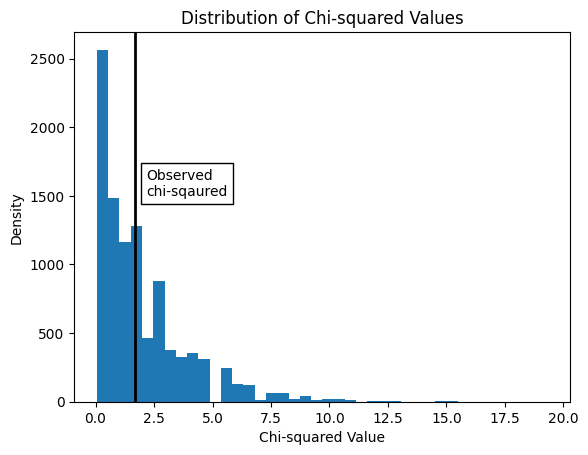

In [75]:
results = []
expected = stats.contingency.expected_freq(df)
chi2_initial = ((df - expected) ** 2 / expected).sum().sum()
print(f"Initial Chi-squared: {chi2_initial}")
for _ in range(10000):
    draw = stats.random_table.rvs(df.sum(axis=1), df.sum(axis=0))
    chi2 = ((draw - expected) ** 2 / expected).sum().sum()
    results.append(chi2)

plt.hist(results, bins=40)
plt.axvline(chi2_initial, color='black', lw=2)
plt.text(chi2_initial*1.3, 1500, 'Observed\nchi-sqaured', bbox={'facecolor':'white'})
plt.title('Distribution of Chi-squared Values')
plt.xlabel('Chi-squared Value')
plt.ylabel('Density')
p_val = (np.array(results) >= chi2_initial).mean()
print(f"Chi-squared p-value: {p_val}")

Альтернативный способ сделать тоже самое гораздо быстрее (но без возможности построить распределение) приведён ниже.

In [76]:
result = stats.chi2_contingency(df, method=stats.MonteCarloMethod(), correction=False)
print(f"Chi-squared test statistic: {result.statistic}")
print(f"Chi-squared p-value: {result.pvalue}")

Chi-squared test statistic: 1.6659394708658917
Chi-squared p-value: 0.4837


### Формульный подход

Распределение статистики хи-квардрат ассимптотически аппроксимируется распределением хи-квадрат с соответствующим количеством степеней свободы.

**Степени свободы (degrees of freedom)** - для таблицы сопряженности количество степеней свободы равно $(r-1)*(c-1)$

По умолчанию метод [chi2_contingency](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html#scipy.stats.chi2_contingency) использует распределение хи-квадрат. Применение этого метода имеет ряд ограничений:
1. Во всех ячейках таблицы значения должны быть не менее **5**
2. В таблице не должно быть пропусков
3. Когда сумма всех значений невелика лучше сделать один из точных тестов.

# ANOVA (Analysis of variance)

ANOVA используется для тестирования статистически значимых различий между группами, содержащими численные значения.

Интуитивной альтернативой было бы проведение всех попарных тестов для групп, однако в такой случае нужно менять значение альфа, чтобы сохранить желаемую статистическую значимость (если групп много, то при заданной альфе чисто случайно может быть ошибка первого рода).

Тест ANOVA, основанный на F-статистике предъявляют ряд требований к данным:
1. Все группы независимы
2. Все группы набраны случайным образом из своих популяций
3. Популяции, из которых набраны группы имеют нормальное распределение
4. Дисперсии популяций равны

### **Ключевые понятия**
1. **Парное сравнение (pairwise comparison)** - проверка статистической гипотезы (например, равенства средних) между двумя группами.
2. **Общий тест (omnibus test)** - единый тест гипотезы об общей дисперсии некоторой статистики нескольких групп.
   1. Например тест о равенстве средних значений во всех группах
   2. Даёт общий ответ о наличии различий, но не говорит между какими конкретно группами есть различие.
3. **Разложение дисперсии (decomposition of variance)** -  
4. **F-статистика** - стандартизированная статистика, которая измеряет на сколько средние значения групп различаются друг от друга по сравнению с тем, чего можно было бы ожидать, если бы все группы были случайными выборками из единой популяции.

**Перестановочная реализация без дополнительных предположений о данных**
1. Собираем все данные в один набор.
2. Набираем заново группы случайным образом (количество элементов в группах остаётся прежним).
3. Считаем средние значения в группах.
4. Считаем дисперсию этих средних значений.
5. Повторяем пункты 2-4 много раз.
6. Строим распределение посчитанной таким образом дисперсии и смотрим в какой доле случаев дисперсия равна или больше нашей исходной величине дисперсии средних значений. Эта величина и будет p-значением.

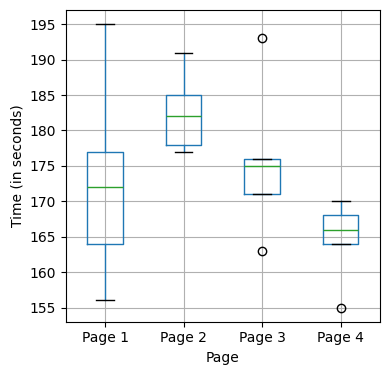

In [11]:
df = pd.read_csv(os.path.join('data', 'four_sessions.csv'))

ax = df.boxplot(by='Page', column='Time',
                           figsize=(4, 4))
ax.set_xlabel('Page')
ax.set_ylabel('Time (in seconds)')
plt.suptitle('')
plt.title('')

plt.tight_layout()
plt.show()

In [12]:
grouped = df.pivot(columns='Page', values='Time').apply(lambda x: x.dropna(ignore_index=True))
grouped.head()

Page,Page 1,Page 2,Page 3,Page 4
0,164.0,178.0,175.0,155.0
1,172.0,191.0,193.0,166.0
2,177.0,182.0,171.0,164.0
3,156.0,185.0,163.0,170.0
4,195.0,177.0,176.0,168.0


In [13]:
print('Observed means:')
print(grouped.mean())
print('Observed means variance:', grouped.mean().var())
observed_var = grouped.mean().var()

Observed means:
Page
Page 1    172.8
Page 2    182.6
Page 3    175.6
Page 4    164.6
dtype: float64
Observed means variance: 55.426666666666655


P-value 0.08233333333333333


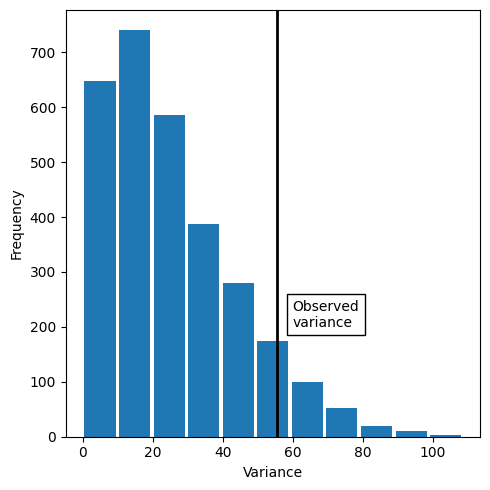

In [166]:
def perm_test(df):
    df = df.copy()
    df['Time'] = np.random.permutation(df['Time'])
    return df.groupby('Page').mean().var().iloc[0]

perm_variance = [perm_test(df) for _ in range(3000)]
print('P-value', np.mean([var > observed_var for var in perm_variance]))

fig, ax = plt.subplots(figsize=(5, 5))
ax.hist(perm_variance, bins=11, rwidth=0.9)
ax.axvline(x = observed_var, color='black', lw=2)
ax.text(60, 200, 'Observed\nvariance', bbox={'facecolor':'white'})
ax.set_xlabel('Variance')
ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Альтернативный подход с использованием метода `permutation_test`

P-value 0.0754


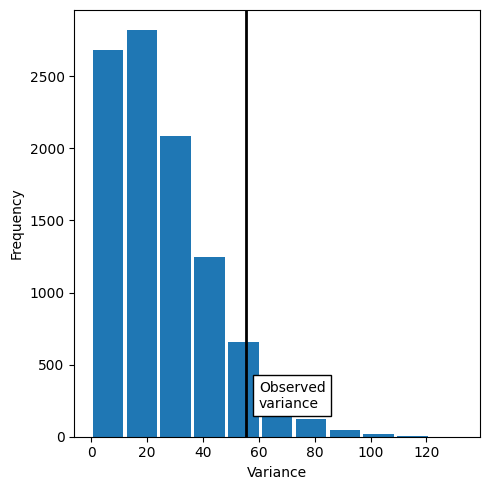

In [177]:
# ddof=1 сделано, чтобы соответствовать значениям, приведенным в учебнике, но мне кажется, что здесь дисперсия должна быть рассчитана с ddof=0
result = stats.permutation_test([grouped[col] for col in grouped.columns], lambda *x: np.mean(x, axis=1).var(ddof=1), n_resamples=9999, alternative='greater')
print('P-value', result.pvalue) 

fig, ax = plt.subplots(figsize=(5, 5))
ax.hist(result.null_distribution, bins=11, rwidth=0.9)
ax.axvline(x = observed_var, color='black', lw=2)
ax.text(60, 200, 'Observed\nvariance', bbox={'facecolor':'white'})
ax.set_xlabel('Variance')
ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## F-статистика

F-статистика - результат сравнения популяционной дисперсии двумя разными способами:
1. Через дисперсию значений внутри групп (в этом случае оценкой будет среднее значение таких дисперсих для всех групп).
2. Через дисперсию средних значений групп (в этом случае согласно ЦПТ оценкой будет дисперсия средних значений, умноженная на количество значений в группе).

F-статистика - отношение второй из этих оценок к первой.

In [197]:
aver_group_var = grouped.var().mean()
print(f'Средняя дисперсия значений внутри групп: {aver_group_var:.2f}')
var_of_group_means = grouped.mean().var()
print(f'Дисперсия средних значений групп: {var_of_group_means:.2f}')
f_value = (var_of_group_means * len(grouped)) / aver_group_var
print(f'F-значение: {f_value:.2f}')

Средняя дисперсия значений внутри групп: 101.15
Дисперсия средних значений групп: 55.43
F-значение: 2.74


ANOVA тест можно делать с помощью готовых функций из scipy или statsmodels

In [199]:
# scipy ANOVA
f_statistic, p_value = stats.f_oneway(*[grouped[col] for col in grouped.columns])
print(f'Scipy ANOVA F-statistic: {f_statistic:.2f}, p-value: {p_value:.4f}')

Scipy ANOVA F-statistic: 2.74, p-value: 0.0776


In [198]:
# statsmodels ANOVA
model = smf.ols('Time ~ Page', data=df).fit()
aov_table = sm.stats.anova_lm(model)
print(aov_table)

            df  sum_sq     mean_sq         F    PR(>F)
Page       3.0   831.4  277.133333  2.739825  0.077586
Residual  16.0  1618.4  101.150000       NaN       NaN


# Определение размера выборки (Power and sample size)

### **Ключевые понятия**

1. **Размер эффекта (effect size)** - Минимальная величина  эффекта, которую требуется задетектировать. Например увеличение частоты появления какого-то явления на 20%.
2. **Мощность (power)** - Вероятность обнаружить заданный размер эффекта при определённом размере выборки. Типичное желаемое значение 80%.
3. **Уровень значимости (significance level)** - Значение уровня статистической значимости, при которой проводится тест.

**Стандратныйы вопрос**, на который пытаемся ответить: какой размер выборки нужно взять, чтобы обнаружить изменение в значении интересующего нас параметра на Х процентов с вероятность Y и уровнем статистической значимости alpha?

### Пример

Представим, что у нас есть достаточно редкое событие, которое происходит примерно в 2% случаев и мы хотим задетектировать увеличение частоты возникновения этих случаев на 10% (т.е. до 2.2%) с уровнем статистической значимости 0.05. Нас устроит вероятность задетектировать такое изменение в 80% случаев. Какой минимальный размер выборки нам нужно взять?

**Решение без использования статистических формул**

1. Создаём 2 набора данных, симулирующих наши популяции.
2. Набираем по выборке (с замещением, bootstrap выборки) из каждого набора данных.
3. Проводим любой тест статстической значимости (перестановочный или с использованием формул).
4. Повторяем шаги 2-3 много раз и смотрим с какой вероятностью мы смогли задетектирвоать интересующий нас эффект. Увеличиваем размер выборки пока не добъемся нужного значения.

In [6]:
init_rate = 0.02
eff_size = 0.1
final_rate = init_rate * (1 +eff_size)
pop_size = 1000
repeats = 1000
alpha = 0.05
set_power = 0.8
sample_size = 50000

s1 = pd.Series([1]*int(pop_size*init_rate) + [0]*int(pop_size*(1-init_rate)))
s2 = pd.Series([1]*int(pop_size*final_rate) + [0]*int(pop_size*(1-final_rate)))

def run_simulation(sample_size):
    p_values = []
    for _ in range(repeats):
        sample1 = s1.sample(sample_size, replace=True, ignore_index=True)
        sample2 = s2.sample(sample_size, replace=True, ignore_index=True)
        _, p_value = stats.ttest_ind(sample1, sample2, equal_var=False, alternative='less')
        p_values.append(p_value)
    return p_values

def calculate_power(p_values):
    significant_results = [p < alpha for p in p_values]
    power = sum(significant_results) / len(significant_results)
    return power

while True:
    pwr = calculate_power(run_simulation(sample_size))
    print(f"Sample size: {sample_size}, Power: {pwr:.4f}")
    if pwr >= set_power:
        print(f"Achieved desired power of {set_power} with sample size {sample_size}.")
        break
    sample_size += 1000

Sample size: 50000, Power: 0.7220
Sample size: 51000, Power: 0.7310
Sample size: 52000, Power: 0.6860
Sample size: 53000, Power: 0.7420
Sample size: 54000, Power: 0.7460
Sample size: 55000, Power: 0.7630
Sample size: 56000, Power: 0.7530
Sample size: 57000, Power: 0.7490
Sample size: 58000, Power: 0.7590
Sample size: 59000, Power: 0.7740
Sample size: 60000, Power: 0.7720
Sample size: 61000, Power: 0.7840
Sample size: 62000, Power: 0.8040
Achieved desired power of 0.8 with sample size 62000.


**Решение с использованием готовых функций**

In [7]:
effect_size = sm.stats.proportion_effectsize(init_rate*(1+eff_size), init_rate)
analysis = sm.stats.TTestIndPower()
result = analysis.solve_power(effect_size=effect_size, 
                              alpha=alpha, power=set_power, alternative='larger')
print('Sample Size: %.3f' % result)

Sample Size: 63518.724


При увеличении величины детектируемого изменения размер выборки будет быстро меняться

In [8]:
eff_size = 0.5
effect_size = sm.stats.proportion_effectsize(init_rate*(1+eff_size), init_rate)
analysis = sm.stats.TTestIndPower()
result = analysis.solve_power(effect_size=effect_size, 
                              alpha=alpha, power=set_power, alternative='larger')
print('Sample Size: %.3f' % result)

Sample Size: 2984.721
